# Lending Club Case Study

# Overview - Business Understanding

You work for a **consumer finance company** which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two **types of risks** are associated with the bank’s decision:

- If the applicant is **likely to repay the loan**, then not approving the loan results in a loss of business to the company

- If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how **consumer attributes** and **loan attributes** influence the tendency of default.

<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

When a person applies for a loan, there are **two types of decisions** that could be taken by the company:

- **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

    - **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
    - **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who **default** cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

# IMPORT LIBRARIES AND DATASETS

In [320]:
# import package
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics

%matplotlib inline
sns.set()


## Data Loading and Description

- **Loan Data Set** - It contains the complete loan data for all loans issued through the time period 2007 to 2011.
- **Data Dictionary** - You can access the data dictionary which describes the meaning of these variables from the provided link below:

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end.

Let us check the basic information of the dataset. The very basic information to know is the dimension of the dataset – rows and columns – that’s what we find out with the method shape.

In [321]:
# Load Data
df_loan = pd.read_csv('Data/loan.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [322]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [323]:
df_loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
# Check how many row & columns available in both dataset
df_loan.shape

(39717, 111)

loan dataset has __39717 rows and 111 columns.__

In [325]:
# Get info from both data set to understand data in depths 
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [326]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


- The dataset contains details information related to the Customers loans application such as loan amount, funded amount, interest rate, grade, etc. between 2007 and 2011.
- The dataset comprises of __39717 observations of 111 columns__. Above is a table showing names of all the columns and their description.
- There are few columns have all and/or some NULL/NaN values that either need to drop or fill some value

# Utils functions

In [327]:
def findColumnWithNA():
    result = len(df_loan.columns[df_loan.isna().all()])
    print("{} columns having null values".format(result))

In [328]:
def findColumnWithAtleastOneNA():
    result = len(df_loan.columns[df_loan.isna().any()])
    print("{} columns having at least null values".format(result))

In [329]:
def findColumnWithoutNA():
    result = len(df_loan.columns[df_loan.notna().all()])
    print("{} columns having other than null values".format(result))

In [330]:
def describeDataSet():
    print("We are having {} columns in the loan dataframe, out of which ".format(len(df_loan.columns)))
    findColumnWithNA()
    findColumnWithAtleastOneNA()
    findColumnWithoutNA()

In [331]:
def getUniqueValues(df):
    for (columnName, columnData) in df.iteritems():
        print('\n Colunm Name : ', columnName)
        print(' Column Contents : ', columnData.unique())

In [332]:
def getUniqueValuesWithNaN(df):
    columns_name = df.columns[df.isnull().any()].tolist()
    print(columns_name)
    for column_name in columns_name:
        print('\n Colunm Name : ', column_name)
        print(' Column Contents : ', df[column_name].unique())
        print(' Column Contents counts : ', df[column_name].nunique())

In [318]:
def isNullValuePresentInDataset(df):
    result = df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]
    result.sort_values(ascending=False)
    print(result)

## DATA CLEANUP

In [333]:
# describeDataSet before delete Columns with NA value
describeDataSet()

We are having 111 columns in the loan dataframe, out of which 
54 columns having null values
68 columns having at least null values
43 columns having other than null values


We are having 54 Columns with null values that we need to removes all from the datasets

In [334]:
df_loan = df_loan.drop(df_loan.columns[df_loan.isna().sum()>len(df_loan.columns)],axis = 1)

# We can drop row which having at least null value
df_loan = df_loan.dropna(axis = 0).reset_index(drop=True)

In [335]:
# describeDataSet after delete Columns with NA value
describeDataSet()

We are having 50 columns in the loan dataframe, out of which 
0 columns having null values
0 columns having at least null values
50 columns having other than null values


Get all columns which having at lest one null/NaN values

In [336]:
isNullValuePresentInDataset(df_loan)

Series([], dtype: float64)


In [337]:
getUniqueValuesWithNaN(df_loan)

[]


In [338]:
df_loan.collections_12_mths_ex_med.describe()

count    39531.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [339]:
df_loan.chargeoff_within_12_mths.describe()

count    39531.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [340]:
df_loan.tax_liens.describe()

count    39531.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

Since there are zero values in chargeoff_within_12_mths, chargeoff_within_12_mths & tax_liens columns, we can drop those columns.

In [341]:
df_loan = df_loan.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens' ],axis = 1)
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0


In [342]:
getUniqueValuesWithNaN(df_loan)

[]


Remove '%' from revol_utls columns & then replace null/NaN value with median value

In [343]:
# df_loan['revol_util_percentage'] = df_loan['revol_util'].str.rstrip('%')
# del df_loan['revol_util']
# df_loan['revol_util_percentage'] = df_loan['revol_util_percentage'].fillna(df_loan['revol_util_percentage'].median())

In [ ]:
df_loan.revol_util = pd.to_numeric(df_loan.revol_util.apply(lambda x : x.split('%')[0]))
df_loan['revol_util_percentage'] = df_loan['revol_util_percentage'].fillna(df_loan['revol_util_percentage'].median())

We also need to remove '%' from int_rate columns 

In [344]:
df_loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [345]:
df_loan['term_in_months'] = df_loan['term'].str.rstrip('months')
del df_loan['term']

In [346]:
df_loan['int_rate'].unique()[:5]

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%'], dtype=object)

In [348]:
df_loan['int_rate_percentage'] = df_loan['int_rate'].str.rstrip('%')
del df_loan['int_rate']

KeyError: 'int_rate'

In [349]:
df_loan['issue_d_month'], df_loan['issue_d_year'] = df_loan['issue_d'].str.split('-').str

df_loan['last_credit_pull_d_month'], df_loan['last_credit_pull_d_year'] = df_loan['last_credit_pull_d'].str.split('-').str

df_loan['last_pymnt_d_month'], df_loan['last_pymnt_d_year'] = df_loan['last_pymnt_d'].str.split('-').str

df_loan['earliest_cr_line_month'], df_loan['earliest_cr_line_year'] = df_loan['earliest_cr_line'].str.split('-').str

<ipython-input-349-f222600e2d4f>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_loan['issue_d_month'], df_loan['issue_d_year'] = df_loan['issue_d'].str.split('-').str
<ipython-input-349-f222600e2d4f>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_loan['last_credit_pull_d_month'], df_loan['last_credit_pull_d_year'] = df_loan['last_credit_pull_d'].str.split('-').str
<ipython-input-349-f222600e2d4f>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_loan['last_pymnt_d_month'], df_loan['last_pymnt_d_year'] = df_loan['last_pymnt_d'].str.split('-').str
<ipython-input-349-f222600e2d4f>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_loan['earliest_cr_line_month'], df_loan['earliest_cr_line_year'] = df_loan['earliest_cr_line'].str.split('-').str


In [350]:
df_loan['issue_d_year'] = '20' + df_loan['issue_d_year']


Drop columns from which we have derived new columns


In [351]:
del df_loan['issue_d']
del df_loan['last_credit_pull_d']
del df_loan['last_pymnt_d']
del df_loan['earliest_cr_line']

In [352]:
getUniqueValues(df_loan)


 Colunm Name :  id
 Column Contents :  [1077501 1077430 1077175 ...  120525  120374  120215]

 Colunm Name :  member_id
 Column Contents :  [1296599 1314167 1313524 ...  120227  119635  118760]

 Colunm Name :  loan_amnt
 Column Contents :  [ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  99

In [353]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,...,term_in_months,int_rate_percentage,issue_d_month,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year
0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,RENT,24000.0,...,36,10.65,Dec,2011,May,16,Jan,15,Jan,85
1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,RENT,30000.0,...,60,15.27,Dec,2011,Sep,13,Apr,13,Apr,99
2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,RENT,12252.0,...,36,15.96,Dec,2011,May,16,Jun,14,Nov,01
3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,RENT,49200.0,...,36,13.49,Dec,2011,Apr,16,Jan,15,Feb,96
4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,RENT,80000.0,...,60,12.69,Dec,2011,May,16,May,16,Jan,96


In [354]:
df_loan.shape

(39531, 51)

In [315]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   member_id                 39717 non-null  int64  
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   installment               39717 non-null  float64
 6   grade                     39717 non-null  object 
 7   sub_grade                 39717 non-null  object 
 8   home_ownership            39717 non-null  object 
 9   annual_inc                39717 non-null  float64
 10  verification_status       39717 non-null  object 
 11  loan_status               39717 non-null  object 
 12  pymnt_plan                39717 non-null  object 
 13  url                       39717 non-null  object 
 14  purpos

In [355]:
describeDataSet()

We are having 51 columns in the loan dataframe, out of which 
0 columns having null values
0 columns having at least null values
51 columns having other than null values


In [356]:
getUniqueValuesWithNaN(df_loan)

[]


In [357]:
isNullValuePresentInDataset(df_loan)

Series([], dtype: float64)


# Derive Data

In [359]:
# Creating a profit and loss column
df_loan['profit_and_loss']=(df_loan['total_pymnt']- df_loan['funded_amnt'])*100/df_loan['funded_amnt']

In [360]:
df_loan['loan_inc_ratio'] = df_loan.funded_amnt*100/df_loan.annual_inc

In [361]:
columns = ['total_acc', 'term_in_months', 'issue_d_year']
df_loan[columns] = df_loan[columns].astype(np.int)

In [362]:
df_loan['annual_inc_lakhs'] = df_loan['annual_inc'] / 1000

In [363]:
df_loan['annual_inc_lakhs'].describe()

count    39531.000000
mean        69.014674
std         63.836100
min          4.000000
25%         40.746000
50%         59.000000
75%         82.404000
max       6000.000000
Name: annual_inc_lakhs, dtype: float64

In [414]:
# columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
#            'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec']
# df_loan[columns] = df_loan[columns].apply(lambda x: x.astype('category'))

In [416]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,...,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,profit_and_loss,loan_inc_ratio,annual_inc_lakhs
0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,RENT,24000.0,...,2011,May,16,Jan,15,Jan,85,17.263104,20.833333,24.000
1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,RENT,30000.0,...,2011,Sep,13,Apr,13,Apr,99,-59.651600,8.333333,30.000
2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,RENT,12252.0,...,2011,May,16,Jun,14,Nov,01,25.236119,19.588639,12.252
3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,RENT,49200.0,...,2011,Apr,16,Jan,15,Feb,96,22.318900,20.325203,49.200
4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,RENT,80000.0,...,2011,May,16,May,16,Jan,96,17.111000,3.750000,80.000


In [417]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39531 entries, 0 to 39530
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        39531 non-null  int64   
 1   member_id                 39531 non-null  int64   
 2   loan_amnt                 39531 non-null  int64   
 3   funded_amnt               39531 non-null  int64   
 4   funded_amnt_inv           39531 non-null  float64 
 5   installment               39531 non-null  float64 
 6   grade                     39531 non-null  category
 7   sub_grade                 39531 non-null  category
 8   home_ownership            39531 non-null  category
 9   annual_inc                39531 non-null  float64 
 10  verification_status       39531 non-null  category
 11  loan_status               39531 non-null  category
 12  pymnt_plan                39531 non-null  object  
 13  url                       39531 non-null  obje

# Exploratory Data Analysis  

In [366]:
df_loan["loan_status"].value_counts()

Fully Paid     32856
Charged Off     5535
Current         1140
Name: loan_status, dtype: int64

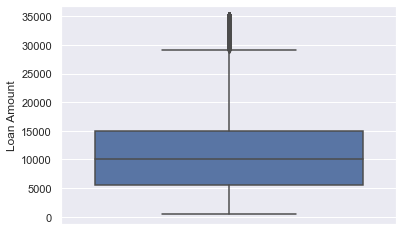

In [367]:
sns.boxplot( y=df_loan["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

Inference: The loan amount varies from 0 to 35,000 having mean of 10,000

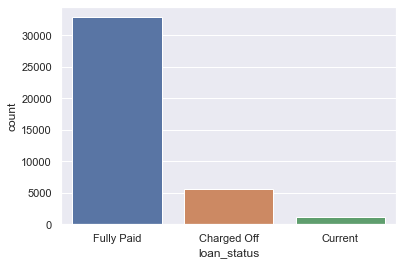

In [368]:
sns.countplot(x= df_loan["loan_status"])
plt.show()

Inference:

Most of the loans are Fully Paid.
About 14% of loan are having status as defaulters.
We have a class imbalance here.

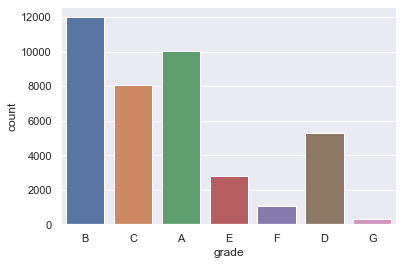

In [369]:
sns.countplot(x='grade', data=df_loan)
plt.show()

Inference: Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


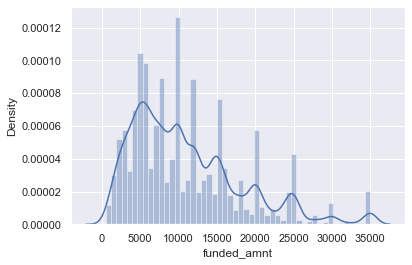

In [370]:
sns.distplot(df_loan['funded_amnt'])
plt.show()

Inference: Funded amount is left skewed. Most of the loan amount given is 5 lakhs

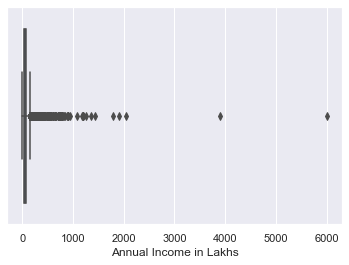

In [371]:
sns.boxplot(x=df_loan['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

Inference: There are only two applicants having annual income of more than 30 lakhs

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


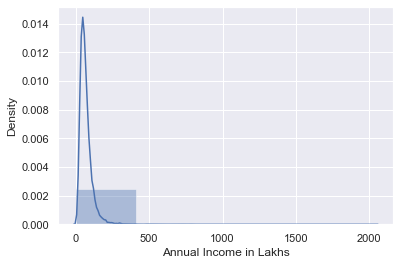

In [372]:
sns.distplot(df_loan[df_loan['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

Inference: Majority of loan applicants have income less than 5 lakhs

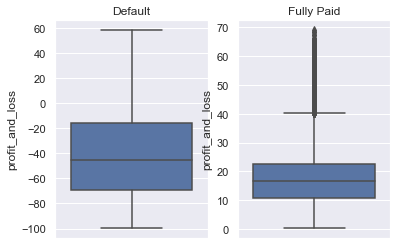

In [373]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df_loan[df_loan.loan_status=='Charged Off'].profit_and_loss)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df_loan[df_loan.loan_status=='Fully Paid'].profit_and_loss)
plt.show()

Let's type cast 'int_rate_percentage' object to float

In [385]:
df_loan['int_rate_percentage'] = df_loan['int_rate_percentage'].astype(float)

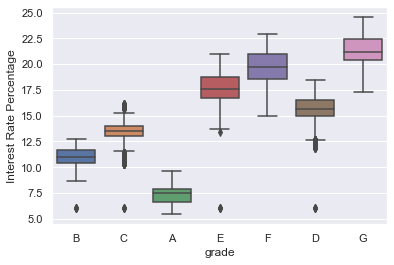

In [386]:
sns.boxplot(y='int_rate_percentage', x='grade', data=df_loan)
plt.ylabel('Interest Rate Percentage')
plt.show()

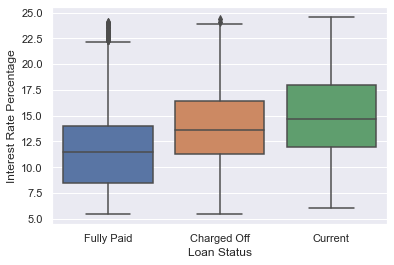

In [387]:
sns.boxplot(y='int_rate_percentage', x='loan_status', data=df_loan)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

## Segmented Univariate Analysis

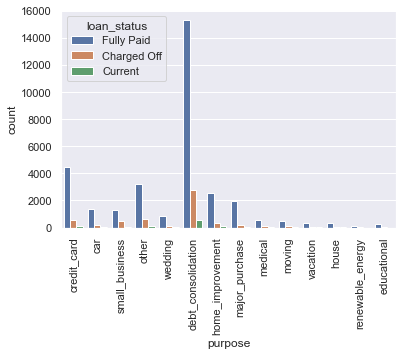

In [388]:
sns.countplot(x='purpose', hue="loan_status", data=df_loan)
plt.xticks(rotation=90)
plt.show()

Inference: Majority of loan has been given for the debt consolidation purpose and has been fully paid.

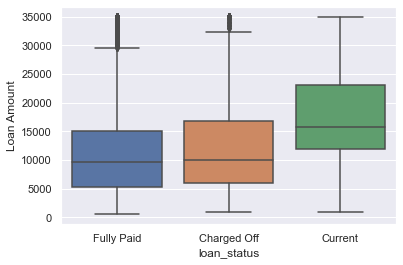

In [389]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df_loan)
plt.ylabel('Loan Amount')
plt.show()

Inference: Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

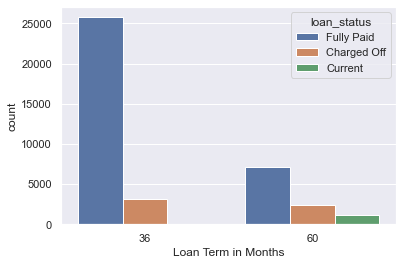

In [390]:
sns.countplot( x="term_in_months", hue='loan_status', data=df_loan)
plt.xlabel('Loan Term in Months')
plt.show()

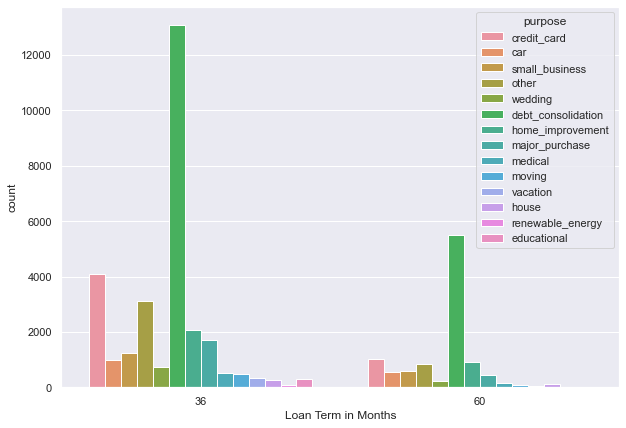

In [391]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_in_months", hue='purpose', data=df_loan)
plt.xlabel('Loan Term in Months')
plt.show()

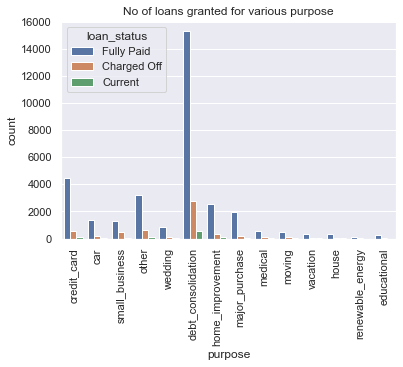

In [392]:
sns.countplot(x='purpose', hue='loan_status', data=df_loan)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

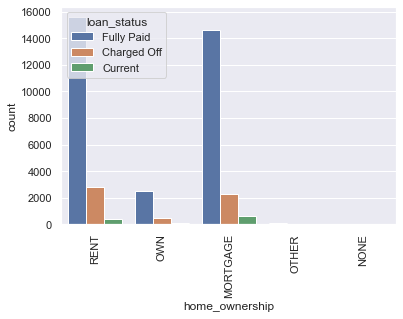

In [393]:
sns.countplot(x='home_ownership',hue='loan_status', data=df_loan)
plt.xticks(rotation=90)
plt.show()

In [399]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39531 entries, 0 to 39530
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39531 non-null  int64  
 1   member_id                 39531 non-null  int64  
 2   loan_amnt                 39531 non-null  int64  
 3   funded_amnt               39531 non-null  int64  
 4   funded_amnt_inv           39531 non-null  float64
 5   installment               39531 non-null  float64
 6   grade                     39531 non-null  object 
 7   sub_grade                 39531 non-null  object 
 8   home_ownership            39531 non-null  object 
 9   annual_inc                39531 non-null  float64
 10  verification_status       39531 non-null  object 
 11  loan_status               39531 non-null  object 
 12  pymnt_plan                39531 non-null  object 
 13  url                       39531 non-null  object 
 14  purpos

In [400]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,...,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,profit_and_loss,loan_inc_ratio,annual_inc_lakhs
0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,RENT,24000.0,...,2011,May,16,Jan,15,Jan,85,17.263104,20.833333,24.000
1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,RENT,30000.0,...,2011,Sep,13,Apr,13,Apr,99,-59.651600,8.333333,30.000
2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,RENT,12252.0,...,2011,May,16,Jun,14,Nov,01,25.236119,19.588639,12.252
3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,RENT,49200.0,...,2011,Apr,16,Jan,15,Feb,96,22.318900,20.325203,49.200
4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,RENT,80000.0,...,2011,May,16,May,16,Jan,96,17.111000,3.750000,80.000


## Bivariate Plots

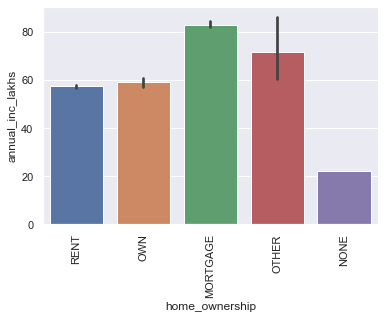

In [405]:
sns.barplot(y='annual_inc_lakhs', x='home_ownership', data=df_loan)
plt.xticks(rotation=90)
plt.show()

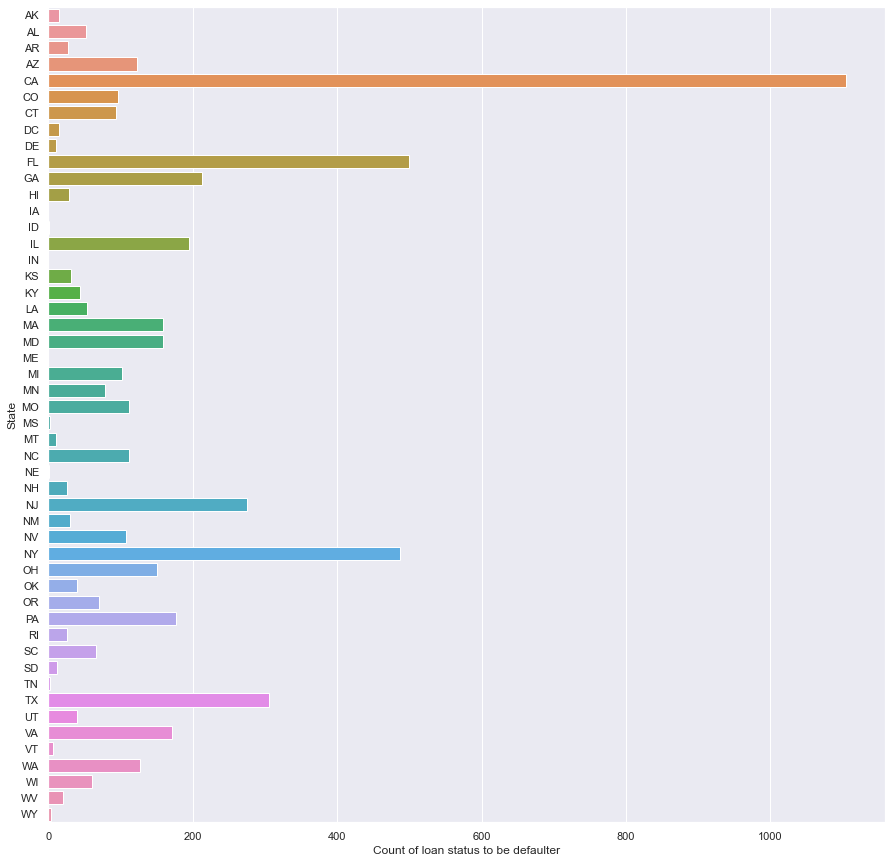

In [419]:
g = df_loan[df_loan['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

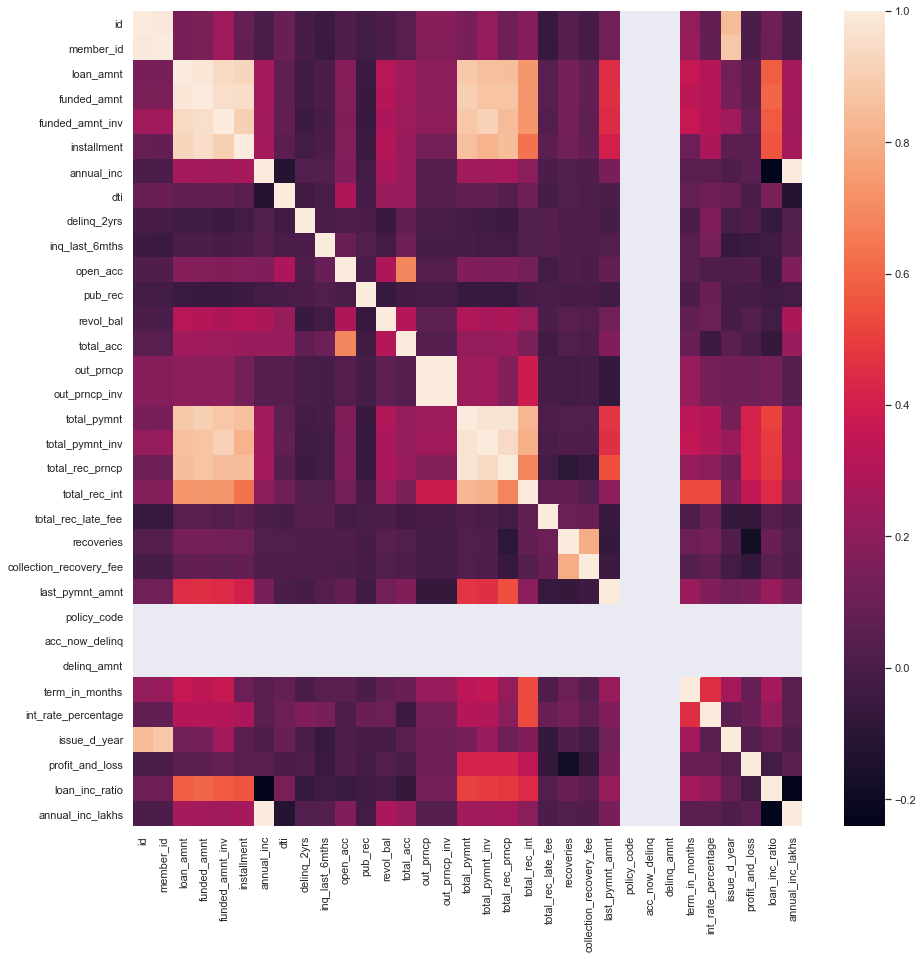

In [407]:
plt.figure(figsize=(15,15))
sns.heatmap(df_loan.corr())
plt.show()

nference: Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

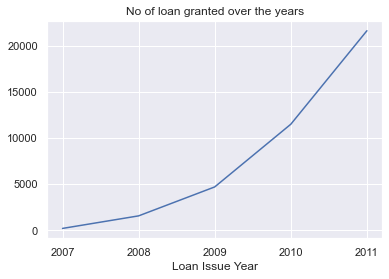

In [408]:
g = df_loan.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

Inference: Loan Applicants have been increasing exponentially from year 2007 to 2011

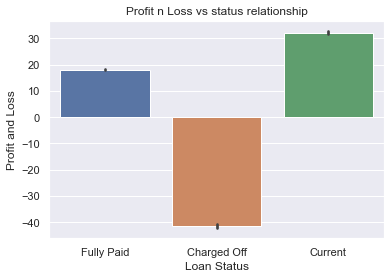

In [411]:
# Relationship of default with funded amount with a barplot
sns.barplot(x='loan_status',y='profit_and_loss',data=df_loan)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

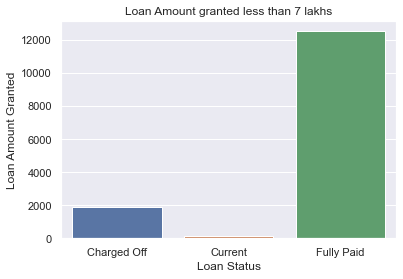

In [412]:
df_agg = df_loan[df_loan['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

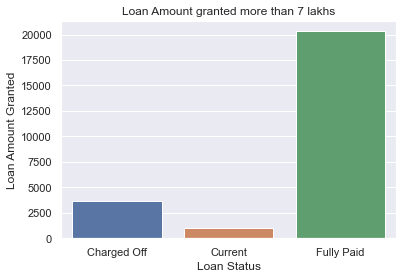

In [413]:
df_agg = df_loan[df_loan['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [422]:
laons_corr_df = df_loan.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate_float','installment','emp_length','annual_inc','dti','l_t_ai']) 
cor = laons_corr_df.corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti
loan_amnt,1.000,0.982,0.941,0.930,0.271,0.065
funded_amnt,0.982,1.000,0.959,0.956,0.267,0.065
funded_amnt_inv,0.941,0.959,1.000,0.906,0.255,0.073
installment,0.930,0.956,0.906,1.000,0.271,0.053
annual_inc,0.271,0.267,0.255,0.271,1.000,-0.123
dti,0.065,0.065,0.073,0.053,-0.123,1.000


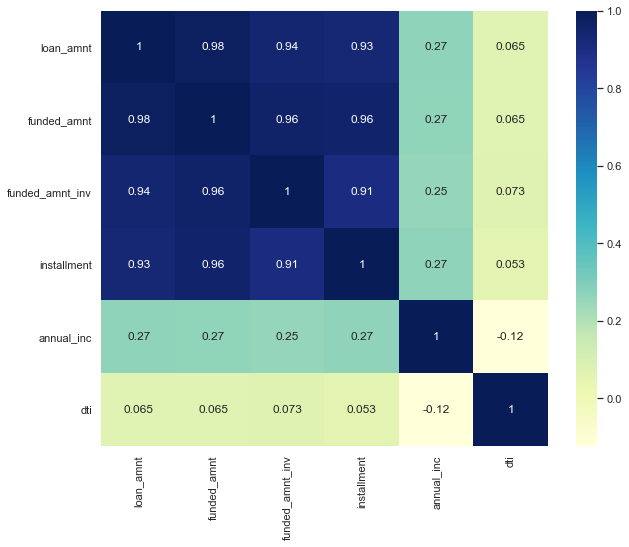

In [423]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()